In [9]:
from data.utils.data_processing import load_historical_weather_data
import matplotlib.pyplot as plt

data = load_historical_weather_data()

<Axes: >

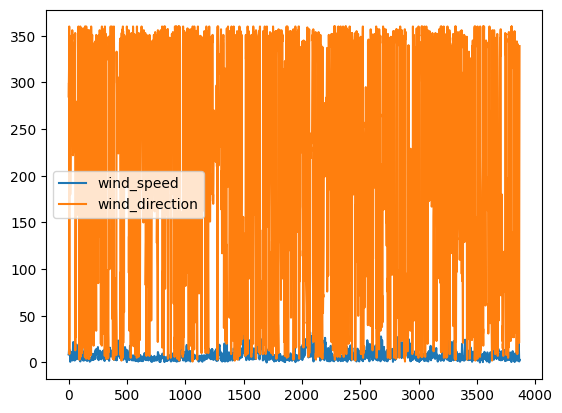

In [3]:
data.plot()

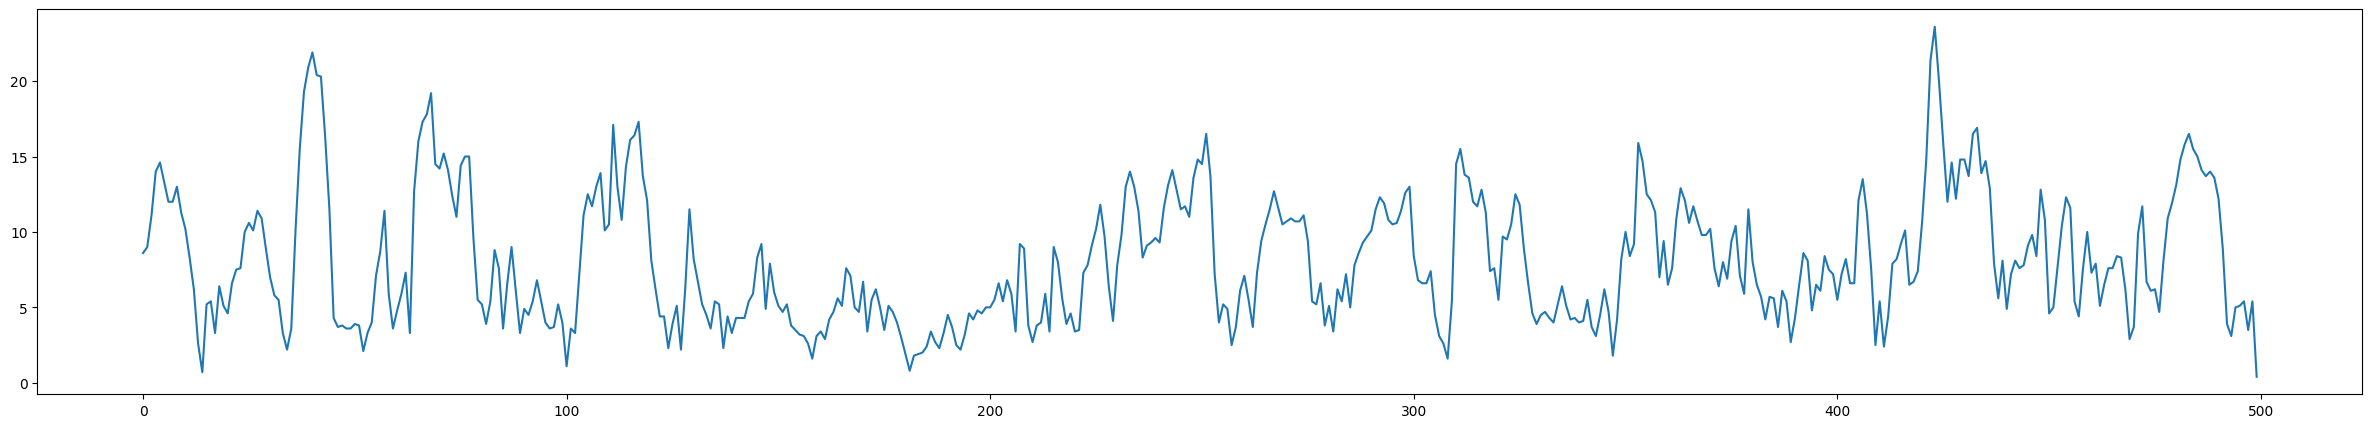

In [16]:
x = data["wind_speed"]

plt.figure(figsize=(30,5))
plt.plot(x[:500])